# Loading Libraries

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
import squarify

%matplotlib inline
 
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
data_import = pd.read_csv("2018-2010_import.csv")
data_export = pd.read_csv("2018-2010_export.csv")

In [3]:
data_export.head(5)

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [4]:
data_import.head(5)

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [5]:
data_export.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


In [6]:
data_import.describe()

,HSCode,value,year
count,93095.000000,79068.000000,93095.000000
mean,53.849573,63.289855,2014.654740
std,27.567486,666.652363,2.702373
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2015.000000
75%,78.000000,4.910000,2017.000000
max,99.000000,32781.570000,2018.000000


In [7]:
data_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [8]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


# Data Cleanup

In [9]:
data_import.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [10]:
data_import[data_import.value==0].head(5)

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.0,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN TIS,2018
11,41,RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...,0.0,AFGHANISTAN TIS,2018
20,81,OTHER BASE METALS; CERMETS; ARTICLES THEREOF.,0.0,AFGHANISTAN TIS,2018
22,84,"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...",0.0,AFGHANISTAN TIS,2018


In [11]:
data_import[data_import.country == "UNSPECIFIED"].head(5)

,HSCode,Commodity,value,country,year
8263,1,LIVE ANIMALS.,NaN,UNSPECIFIED,2018
8264,2,MEAT AND EDIBLE MEAT OFFAL.,NaN,UNSPECIFIED,2018
8265,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",3.1,UNSPECIFIED,2018
8266,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,0.1,UNSPECIFIED,2018
8267,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,UNSPECIFIED,2018


In [12]:
print("Duplicate imports : "+str(data_import.duplicated().sum()))
print("Duplicate exports : "+str(data_export.duplicated().sum()))

Duplicate imports : 18002
Duplicate exports : 0


In [13]:
def cleanup(data_df):
    #setting country UNSPECIFIED to nan
    data_df['country']= data_df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    #ignoring where import value is 0 . 
    data_df = data_df[data_df.value!=0]
    data_df.dropna(inplace=True)
    data_df.year = pd.Categorical(data_df.year)
    data_df.drop_duplicates(keep="first",inplace=True)
    return data_df

In [14]:
data_import = cleanup(data_import)
data_export = cleanup(data_export)

In [15]:
data_import[data_import.value==0].head(5)

,HSCode,Commodity,value,country,year


In [16]:
data_import.isnull().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

In [17]:
data_import[data_import.country == "UNSPECIFIED"].head(5)

,HSCode,Commodity,value,country,year


In [18]:
print("Duplicate imports : "+str(data_import.duplicated().sum()))
print("Duplicate exports : "+str(data_export.duplicated().sum()))

Duplicate imports : 0
Duplicate exports : 0


# Commodity Analysis

In [19]:
print("Import Commodity Count : "+str(len(data_import['Commodity'].unique())))
print("Export Commodity Count : "+str(len(data_export['Commodity'].unique())))

Import Commodity Count : 98
Export Commodity Count : 98


In [20]:
df = pd.DataFrame(data_import['Commodity'].value_counts())
df.head(20)

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1378
IRON AND STEEL,1333
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1314
ALUMINIUM AND ARTICLES THEREOF.,1217
PLASTIC AND ARTICLES THEREOF.,1112
COPPER AND ARTICLES THEREOF.,1058
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1009
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,983
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER,983
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",900


In [21]:
print("No of Country were we are importing Comodities are "+str(len(data_import['country'].unique())))
print("No of Country were we are Exporting Comodities are "+str(len(data_export['country'].unique())))

No of Country were we are importing Comodities are 240
No of Country were we are Exporting Comodities are 246


# Yearwise Import/Export/Trade Deficit Plot

In [22]:
df3 = data_import.groupby('year').agg({'value':'sum'})

df4 = data_export.groupby('year').agg({'value':'sum'})

df3 = df3.rename(columns = {'value':'import_value'})

df3['export_value'] = df4['value']

df3['deficit'] = df3['export_value'] - df3['import_value']

df3

,import_value,export_value,deficit
year,,,
2010,365444.94,235411.01,-130033.93
2011,488272.63,289511.58,-198761.05
2012,488805.22,294946.87,-193858.35
2013,446095.99,302844.13,-143251.86
2014,440463.87,306159.80,-134304.07
2015,372291.40,259791.42,-112499.98
2016,377006.72,273365.16,-103641.56
2017,456379.59,301078.18,-155301.41
2018,513981.62,327151.43,-186830.19


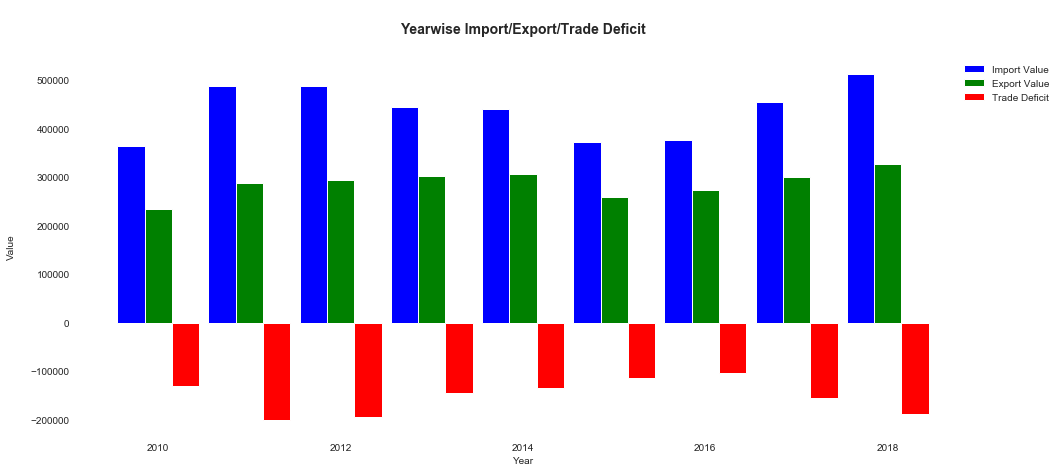

In [23]:
N=9
ind=np.arange(N)
ind=ind+2010
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16,7))
w=0.3


ax.bar(ind-w, df3.import_value, width=w, color='b', align='center')
ax.bar(ind, df3.export_value, width=w, color='g', align='center')
ax.bar(ind+w, df3.deficit, width=w, color='r', align='center')
ax.set_title('\nYearwise Import/Export/Trade Deficit\n', fontsize=14, fontweight='bold')
ax.set(ylabel='Value\n', xlabel='Year')
ax.legend(labels=['Import Value', 'Export Value', 'Trade Deficit'], 
          bbox_to_anchor=(1.1, 1.0), frameon=False)

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

# Country Wise Import/Export Plot

In [24]:
df5 = data_import.groupby('country').agg({'value':'sum'})
df5 = df5.sort_values(by='value', ascending = False)
df5 = df5[:10]
df5

,value
country,
CHINA P RP,532177.51
U ARAB EMTS,256286.08
SAUDI ARAB,241554.99
U S A,219276.66
SWITZERLAND,206729.03
IRAQ,142476.32
INDONESIA,128164.40
KOREA RP,121143.58
GERMANY,119664.64


In [25]:
df6 = data_export.groupby('country').agg({'value':'sum'})
df6 = df6.sort_values(by='value', ascending = False)
df6 = df6[:10]
df6

,value
country,
U S A,360609.57
U ARAB EMTS,289374.88
CHINA P RP,121806.00
HONG KONG,115693.35
SINGAPORE,101679.70
U K,79942.61
GERMANY,68855.45
NETHERLAND,66581.17
SAUDI ARAB,65995.99


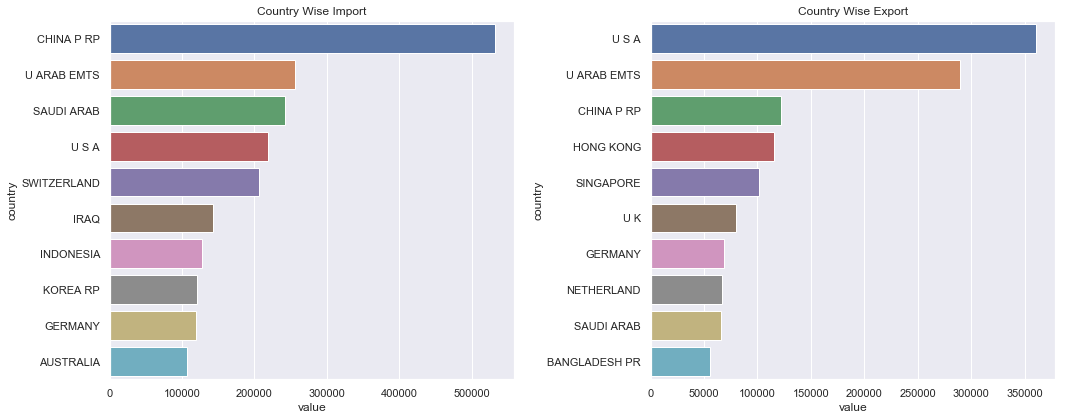

In [26]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = plt.subplot(121)

sns.barplot(df5.value,df5.index).set_title('Country Wise Import')

ax2 = plt.subplot(122)
sns.barplot(df6.value,df6.index).set_title('Country Wise Export')
plt.tight_layout()
plt.show()

# Year Wise Import/Export Values

In [27]:
df3 = data_import.groupby('year').agg({'value':'sum'})

df4 = data_export.groupby('year').agg({'value':'sum'})

df3 = df3.rename(columns = {'value':'import_value'})

df3['export_value'] = df4['value']

df3

,import_value,export_value
year,,
2010,365444.94,235411.01
2011,488272.63,289511.58
2012,488805.22,294946.87
2013,446095.99,302844.13
2014,440463.87,306159.80
2015,372291.40,259791.42
2016,377006.72,273365.16
2017,456379.59,301078.18
2018,513981.62,327151.43


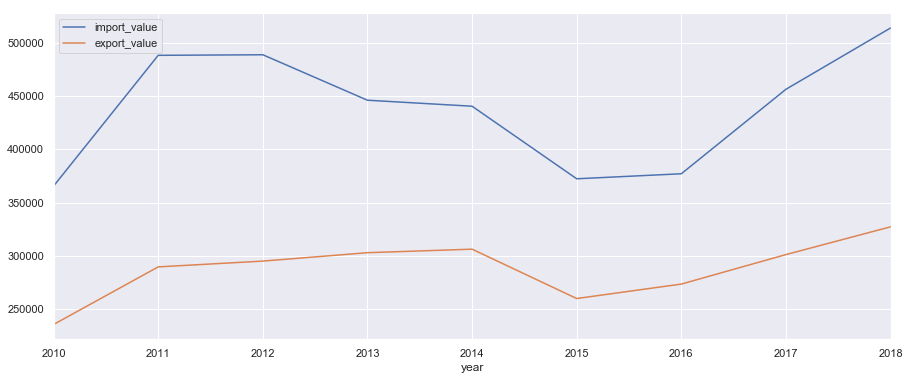

In [28]:
df3.plot()

# Commodity Wise Import/Export Values

In [29]:
df3 = data_import.groupby('Commodity').agg({'value':'sum'})
df3 = df3.sort_values(by='value', ascending = False)
df3 = df3[:10]
df3

,value
Commodity,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",1305259.28
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",611404.45
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",326602.08
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",310410.14
ORGANIC CHEMICALS,150059.05
IRON AND STEEL,102121.07
PLASTIC AND ARTICLES THEREOF.,99483.22
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,90880.98
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",65458.47


In [30]:
df4 = data_export.groupby('Commodity').agg({'value':'sum'})
df4 = df4.sort_values(by='value', ascending = False)
df4 = df4[:10]
df4

,value
Commodity,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",412501.31
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",375706.03
"VEHICLES OTHER THAN RAILWAY OR TRAMWAY ROLLING STOCK, AND PARTS AND ACCESSORIES THEREOF.",124465.27
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",123727.12
ORGANIC CHEMICALS,112712.70
PHARMACEUTICAL PRODUCTS,101504.03
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",89591.47
IRON AND STEEL,76473.01
"ARTICLES OF APPAREL AND CLOTHING ACCESSORIES, NOT KNITTED OR CROCHETED.",75105.04


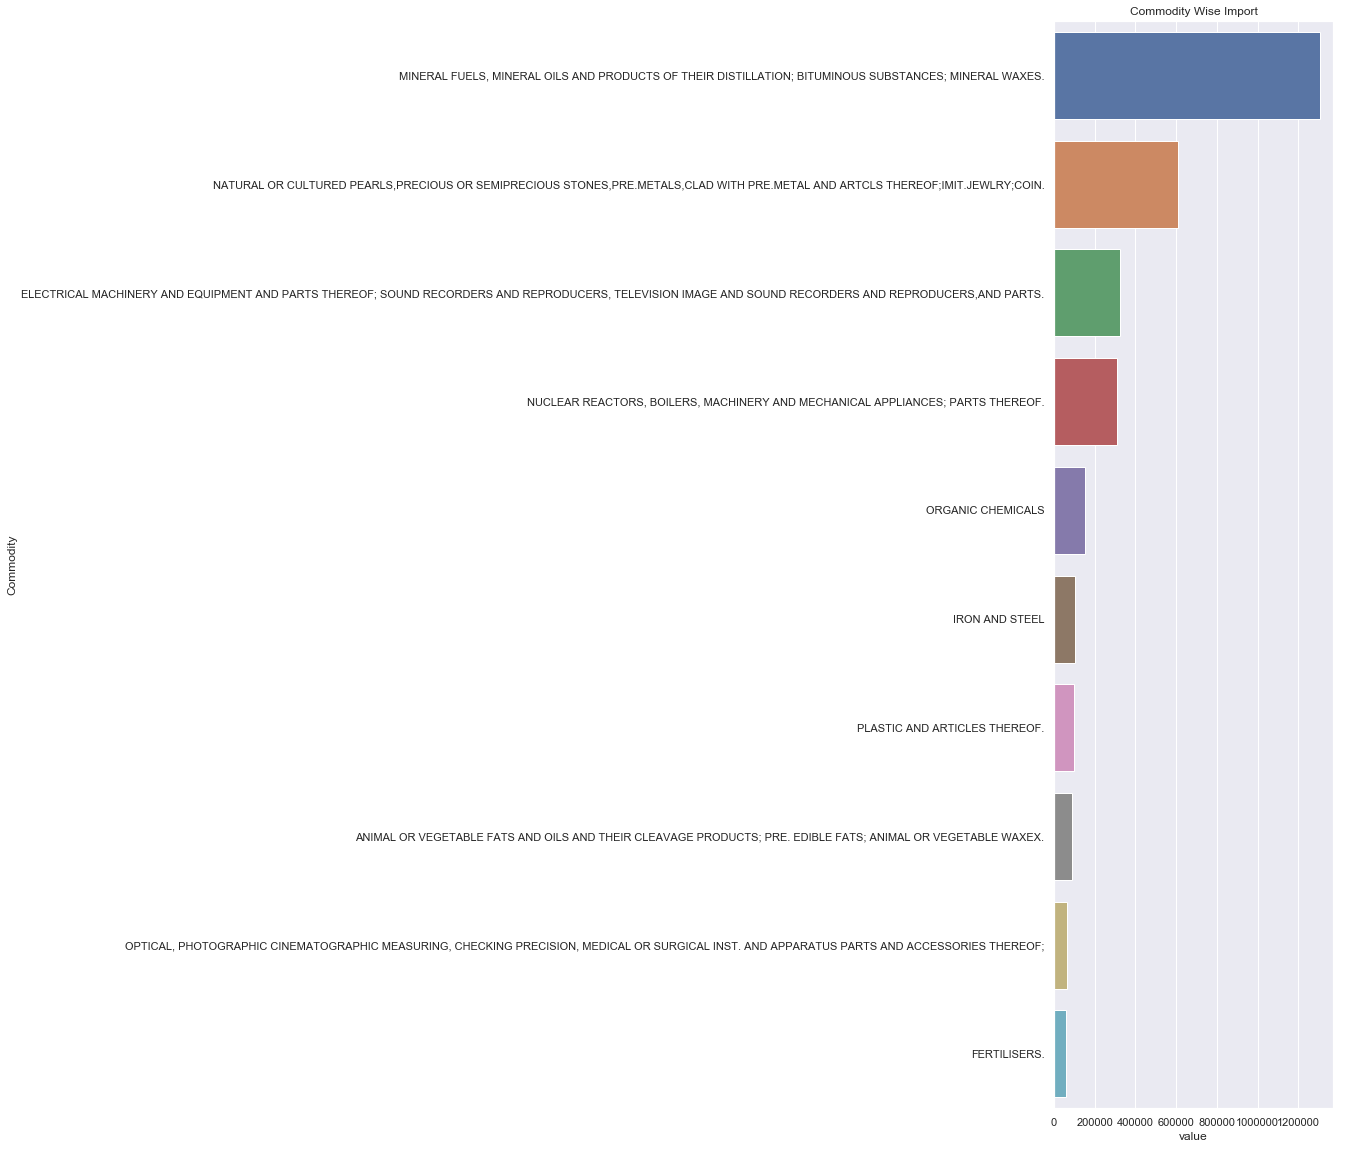

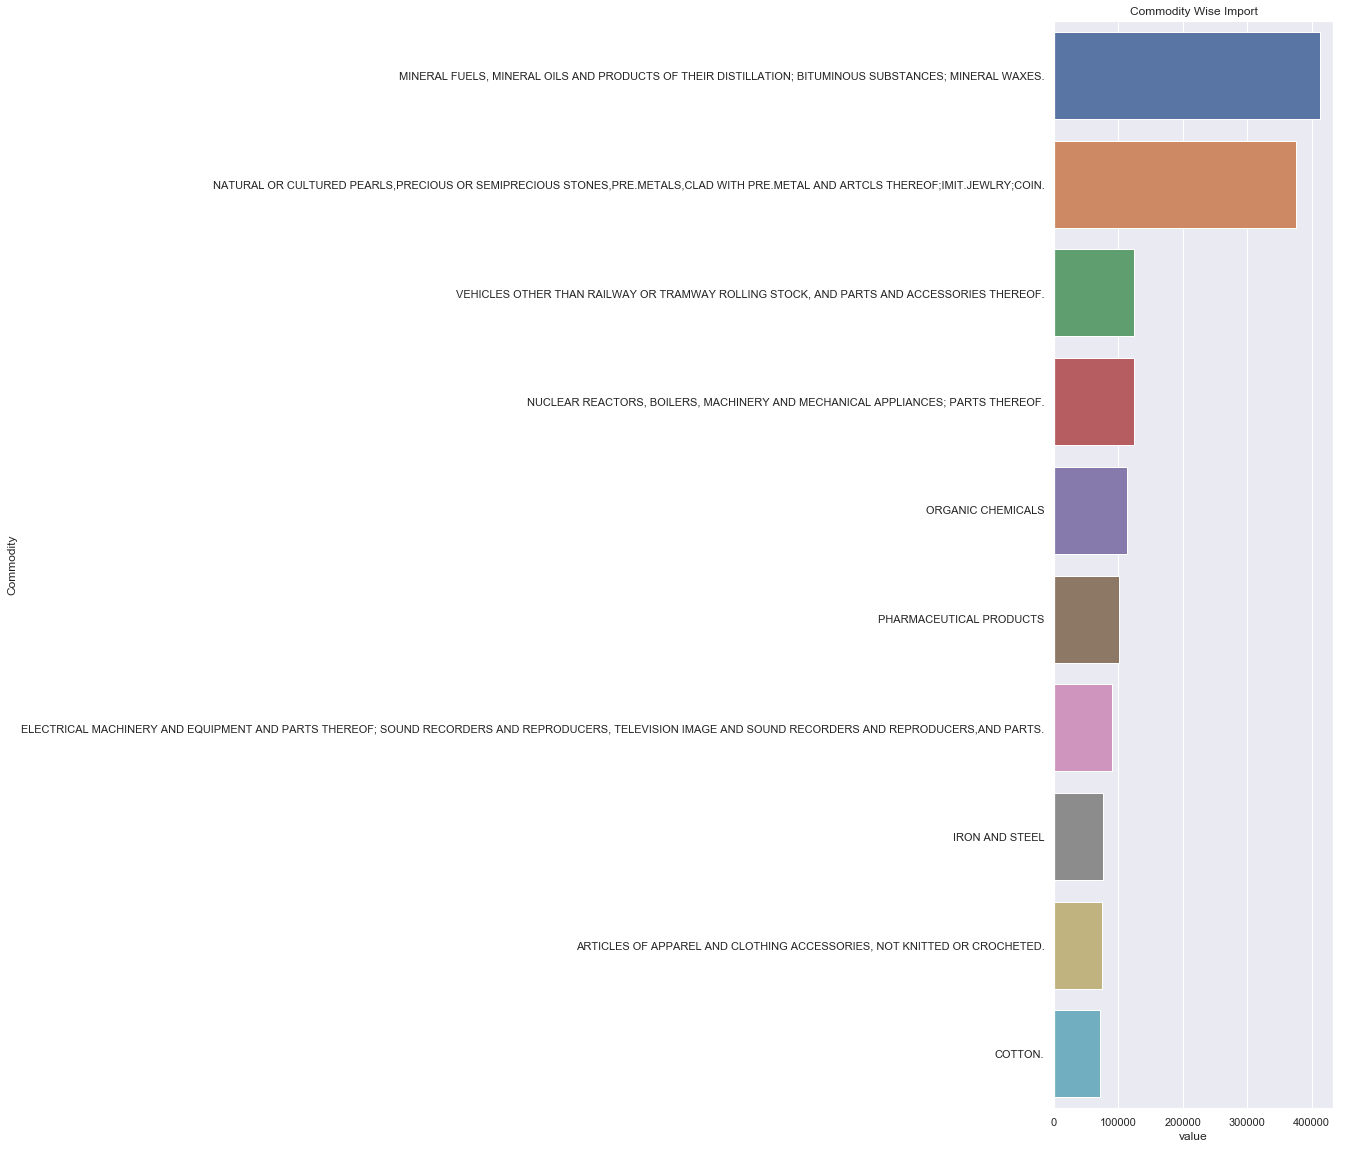

In [31]:
sns.set(rc={'figure.figsize':(5,20)})

sns.barplot(df3.value,df3.index).set_title('Commodity Wise Import')
plt.show()

sns.barplot(df4.value,df4.index).set_title('Commodity Wise Import')
plt.show()

# Expensive Imports HsCode distribution

In [32]:
expensive_import = data_import[data_import.value>1000]
expensive_import.head(10)

,HSCode,Commodity,value,country,year
55,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1559.37,ALGERIA,2018
95,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",4012.00,ANGOLA,2018
142,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,1720.46,ARGENTINA,2018
236,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",9664.58,AUSTRALIA,2018
701,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",6619.68,BELGIUM,2018
942,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1596.79,BRAZIL,2018
1215,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1165.81,CANADA,2018
1414,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1047.32,CHINA P RP,2018
1415,28,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,1050.23,CHINA P RP,2018
1416,29,ORGANIC CHEMICALS,8596.25,CHINA P RP,2018


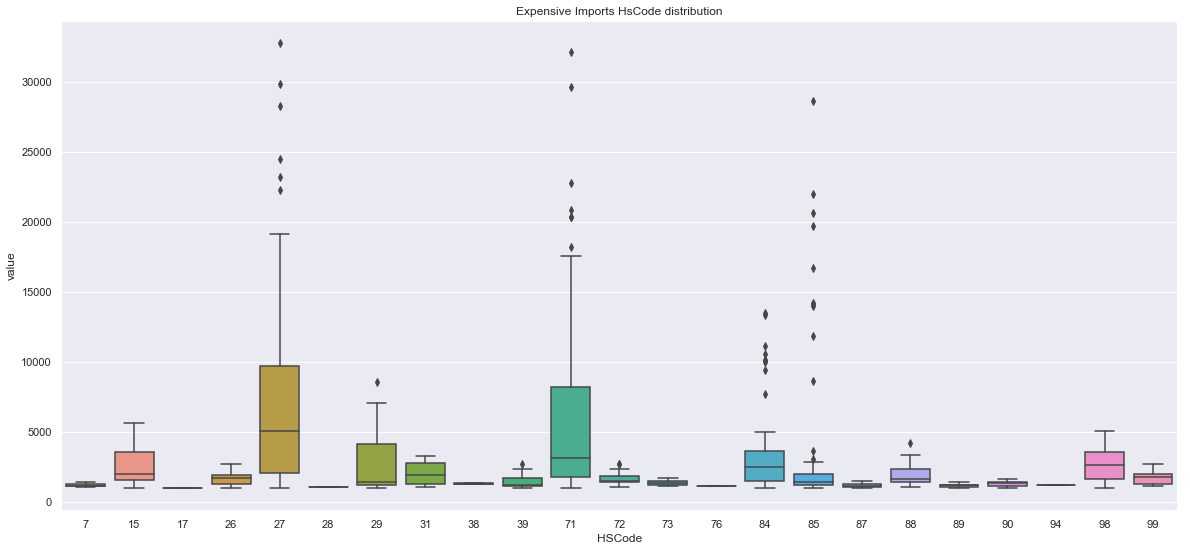

In [33]:
plt.figure(figsize=(20,9))

ax = sns.boxplot(x="HSCode", y="value", data=expensive_import).set_title('Expensive Imports HsCode distribution')
plt.show()

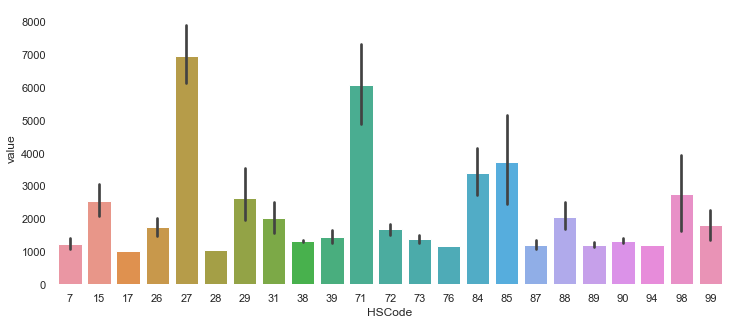

In [34]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(ax=ax,x='HSCode',y='value',data=expensive_import)

sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

# Expensive Imports HsCode Share

In [35]:
df =expensive_import.groupby(['HSCode']).agg({'value': 'sum'})
df = df.sort_values(by='value')
df

,value
HSCode,
17,1015.64
28,1050.23
76,1174.62
94,1200.90
38,2639.56
7,3646.10
87,8406.88
99,10741.46
89,12077.09


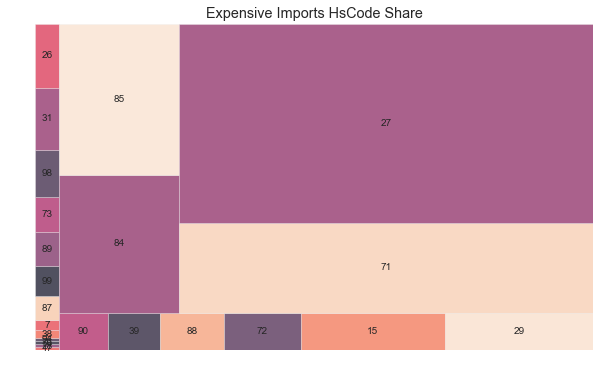

In [36]:
value=np.array(df)
commodityCode=df.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
squarify.plot(sizes=value, label=commodityCode, alpha=.7 )
plt.axis('off')
plt.title("Expensive Imports HsCode Share")
plt.show()

# Expensive Imports Countrywise Share

In [37]:
len(expensive_import['country'].unique())

49

In [38]:
df1 = expensive_import.groupby(['country']).agg({'value': 'sum'})
df1 = df1.sort_values(by='value')
df1

,value
country,
TAIWAN,1117.69
AZERBAIJAN,1128.72
NETHERLAND,1207.54
YEMEN REPUBLC,1722.95
LIBYA,1822.98
TURKEY,2258.34
FINLAND,2330.19
BOTSWANA,2943.78
PERU,3984.90


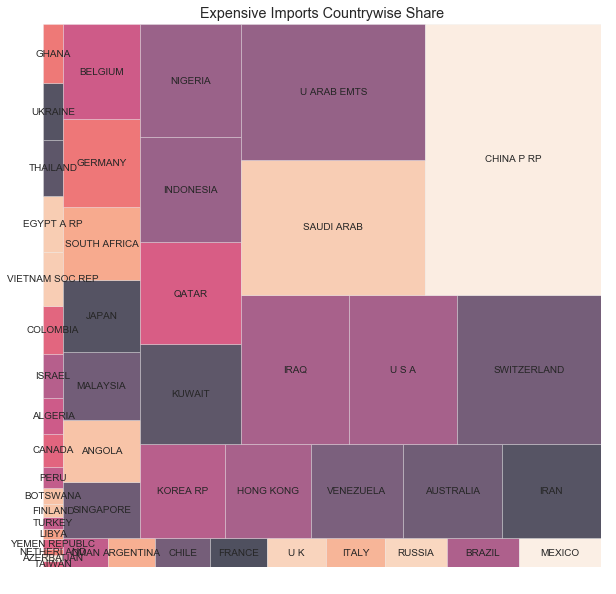

In [39]:
value=np.array(df1)
country=df1.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
squarify.plot(sizes=value, label=country, alpha=.7 )
plt.title("Expensive Imports Countrywise Share")
plt.axis('off')
plt.show()